In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
df_a = pd.read_csv("C:/Users/well_/Desktop/프로젝트cp1/Instacart/aisles.csv")
df_d = pd.read_csv("C:/Users/well_/Desktop/프로젝트cp1/Instacart/departments.csv")
df_opp = pd.read_csv("C:/Users/well_/Desktop/프로젝트cp1/Instacart/order_products__prior.csv")
df_opt = pd.read_csv("C:/Users/well_/Desktop/프로젝트cp1/Instacart/order_products__train.csv")
df_o = pd.read_csv("C:/Users/well_/Desktop/프로젝트cp1/Instacart/orders.csv")
df_p = pd.read_csv("C:/Users/well_/Desktop/프로젝트cp1/Instacart/products.csv")

In [3]:
df_opp.info()
df_opp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
df_opt.info()
df_opt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
# order_products__train(1384617)과 order_products__prior(32434489)을 붙이기
# 관측치, 33,819,106 (약 3400만개)
df_op = pd.concat([df_opp, df_opt], axis=0)
df_op.info()

# 중복치 확인
#df_op.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


In [6]:
# 외부파일로 저장
# df_op.to_csv('C:/Users/well_/Desktop/프로젝트cp1/data/order_products.csv', index = False)

In [7]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [9]:
merge1 = pd.merge(df_op, df_p, how='left', on = ['product_id'])
merge2 = pd.merge(merge1, df_d, how='left', on =['department_id'])
merge3 = pd.merge(merge2, df_a, how='left', on =['aisle_id'])
data = pd.merge(merge3, df_o, how='left', on =['order_id'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


In [11]:
merge4 = pd.merge(df_opt, df_p, how='left', on = ['product_id'])
merge5 = pd.merge(merge4, df_d, how='left', on =['department_id'])
merge6 = pd.merge(merge5, df_a, how='left', on =['aisle_id'])
train = pd.merge(merge6, df_o, how='left', on =['order_id'])

In [12]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   product_name            1384617 non-null  object 
 5   aisle_id                1384617 non-null  int64  
 6   department_id           1384617 non-null  int64  
 7   department              1384617 non-null  object 
 8   aisle                   1384617 non-null  object 
 9   user_id                 1384617 non-null  int64  
 10  eval_set                1384617 non-null  object 
 11  order_number            1384617 non-null  int64  
 12  order_dow               1384617 non-null  int64  
 13  order_hour_of_day       1384617 non-null  int64  
 14  da

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,produce,fresh vegetables,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,produce,fresh vegetables,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,canned meat seafood,112108,train,4,4,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,beverages,water seltzer sparkling water,169679,train,30,0,10,4.0
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,deli,prepared meals,169679,train,30,0,10,4.0
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,dairy eggs,soy lactosefree,139822,train,15,6,10,8.0
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,pantry,spreads,139822,train,15,6,10,8.0


In [13]:
# 외부파일로 저장
# data.to_csv('C:/Users/well_/Desktop/프로젝트cp1/data/data.csv', index = False)
# 외부파일로 저장
# train.to_csv('C:/Users/well_/Desktop/프로젝트cp1/data/train.csv', index = False)

In [14]:
merge7 = pd.merge(df_p, df_a, how='left', on = ['aisle_id'])
id_name = pd.merge(merge7, df_d, how='left', on =['department_id'])
# 외부파일로 저장
# id_name.to_csv('C:/Users/well_/Desktop/프로젝트cp1/data/id_name.csv', index = False)

In [9]:
data = pd.read_csv("C:/Users\well_/Desktop\프로젝트cp1/data/data.csv")

In [10]:
data.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients,202279,prior,3,5,9,8.0
5,2,17794,6,1,Carrots,83,4,produce,fresh vegetables,202279,prior,3,5,9,8.0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,pantry,doughs gelatins bake mixes,202279,prior,3,5,9,8.0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,pantry,spreads,202279,prior,3,5,9,8.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,produce,packaged vegetables fruits,202279,prior,3,5,9,8.0
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,dairy eggs,yogurt,205970,prior,16,5,17,12.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [12]:
data['reordered'] = data['reordered'].astype('category')
data['product_name'] = data['product_name'].astype('category')
data['department'] = data['department'].astype('category')
data['aisle'] = data['aisle'].astype('category')
data['order_dow'] = data['order_dow'].astype('category')
data['order_hour_of_day'] = data['order_hour_of_day'].astype('category')
data = data.drop(columns = ['order_id','product_id', 'aisle_id', 'department_id', 'user_id', 'eval_set'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 9 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   add_to_cart_order       int64   
 1   reordered               category
 2   product_name            category
 3   department              category
 4   aisle                   category
 5   order_number            int64   
 6   order_dow               category
 7   order_hour_of_day       category
 8   days_since_prior_order  float64 
dtypes: category(6), float64(1), int64(2)
memory usage: 1.1 GB


In [13]:
pd.options.display.float_format = '{:.5f}'.format
print(data['add_to_cart_order'].describe())
print(data['order_number'].describe())
print(data['days_since_prior_order'].describe())

count   33819106.00000
mean           8.36774
std            7.13954
min            1.00000
25%            3.00000
50%            6.00000
75%           11.00000
max          145.00000
Name: add_to_cart_order, dtype: float64
count   33819106.00000
mean          17.13998
std           17.49829
min            1.00000
25%            5.00000
50%           11.00000
75%           24.00000
max          100.00000
Name: order_number, dtype: float64
count   31741038.00000
mean          11.36415
std            8.94050
min            0.00000
25%            5.00000
50%            8.00000
75%           15.00000
max           30.00000
Name: days_since_prior_order, dtype: float64


In [14]:
data.isnull().sum()

add_to_cart_order               0
reordered                       0
product_name                    0
department                      0
aisle                           0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [15]:
data_order_number = pd.crosstab(data['order_number'], data['reordered'])
print(data_order_number[0:5])

reordered           0       1
order_number                 
1             2078068       0
2             1490447  557885
3             1258570  792161
4             1075600  894580
5              870202  881757


In [16]:
df_a = data[data['order_number'] == 1]
df_a.sample(10)

,add_to_cart_order,reordered,product_name,department,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order
26465522,7,0,Organic Greek Lowfat Yogurt With Blueberries,dairy eggs,yogurt,1,3,14,NaN
14158252,3,0,Classic Roast Medium Ground Coffee,beverages,coffee,1,1,6,NaN
14803959,5,0,No Pulp Calcium & Vitamin D Pure Premium 100% ...,beverages,juice nectars,1,4,8,NaN
9212347,6,0,Blackberries,produce,fresh fruits,1,1,17,NaN
24867580,2,0,Loose White Button Mushrooms,produce,fresh vegetables,1,6,13,NaN
22695801,2,0,Organic Lemon,produce,fresh fruits,1,1,17,NaN
12156112,4,0,Wrigley's Orbit Wintermint Sugar Free Gum- 3 PK,snacks,mint gum,1,4,16,NaN
5397127,6,0,Creamy Queso Fresco Chipotle,dairy eggs,packaged cheese,1,0,6,NaN
13458145,5,0,Organic Whole Wheat Bread,bakery,bread,1,6,20,NaN
13744855,5,0,Large Grade AA Cage Free Brown Eggs,dairy eggs,eggs,1,0,12,NaN


In [17]:
# 결측치 비율이 약 6%로 꽤 많은 비율을 차지하지만, 30일 이내에 주문하지 않은 고객 = 첫주문 고객
# 재주문율을 타겟데이터로 분석할 예정이므로 첫주문 고객에 대한 자료는 제거(첫주문고객은 재주문이 불가)
df = data.dropna(subset=['days_since_prior_order'])

In [18]:
df.isnull().sum()

add_to_cart_order         0
reordered                 0
product_name              0
department                0
aisle                     0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [20]:
df['days_since_prior_order'] = df['days_since_prior_order'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31741038 entries, 0 to 33819105
Data columns (total 9 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   add_to_cart_order       int64   
 1   reordered               category
 2   product_name            category
 3   department              category
 4   aisle                   category
 5   order_number            int64   
 6   order_dow               category
 7   order_hour_of_day       category
 8   days_since_prior_order  int64   
dtypes: category(6), int64(3)
memory usage: 1.2 GB


C:\Users\well_\AppData\Local\Temp\ipykernel_35196\3727867643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_prior_order'] = df['days_since_prior_order'].astype('int64')


In [21]:
df

,add_to_cart_order,reordered,product_name,department,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,1,Organic Egg Whites,dairy eggs,eggs,3,5,9,8
1,2,1,Michigan Organic Kale,produce,fresh vegetables,3,5,9,8
2,3,0,Garlic Powder,pantry,spices seasonings,3,5,9,8
3,4,1,Coconut Butter,pantry,oils vinegars,3,5,9,8
4,5,0,Natural Sweetener,pantry,baking ingredients,3,5,9,8
...,...,...,...,...,...,...,...,...,...
33819101,3,1,Natural Artesian Water,beverages,water seltzer sparkling water,30,0,10,4
33819102,4,1,Twice Baked Potatoes,deli,prepared meals,30,0,10,4
33819103,1,1,Organic Unsweetened Almond Milk,dairy eggs,soy lactosefree,15,6,10,8
33819104,2,1,Creamy Peanut Butter,pantry,spreads,15,6,10,8


In [22]:
# index 재정렬
df = df.reset_index(drop=True)
# 외부파일로 저장
# df.to_csv('C:/Users/well_/Desktop/프로젝트cp1/data/df_clean.csv', index = False)

In [2]:
df = pd.read_csv("C:/Users\well_/Desktop\프로젝트cp1/data/df_clean.csv")

In [3]:
df

,add_to_cart_order,reordered,product_name,department,aisle,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,1,Organic Egg Whites,dairy eggs,eggs,3,5,9,8
1,2,1,Michigan Organic Kale,produce,fresh vegetables,3,5,9,8
2,3,0,Garlic Powder,pantry,spices seasonings,3,5,9,8
3,4,1,Coconut Butter,pantry,oils vinegars,3,5,9,8
4,5,0,Natural Sweetener,pantry,baking ingredients,3,5,9,8
...,...,...,...,...,...,...,...,...,...
31741033,3,1,Natural Artesian Water,beverages,water seltzer sparkling water,30,0,10,4
31741034,4,1,Twice Baked Potatoes,deli,prepared meals,30,0,10,4
31741035,1,1,Organic Unsweetened Almond Milk,dairy eggs,soy lactosefree,15,6,10,8
31741036,2,1,Creamy Peanut Butter,pantry,spreads,15,6,10,8


타겟데이터의 비율
 1   0.62869
0   0.37131
Name: reordered, dtype: float64


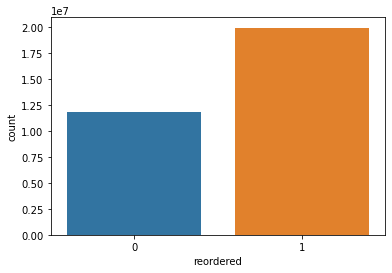

In [24]:
# 타겟 데이터 범주의 비율을 확인
y =  df['reordered']
print("타겟데이터의 비율\n",y.value_counts(normalize=True))

%matplotlib inline
sns.countplot(x=y);

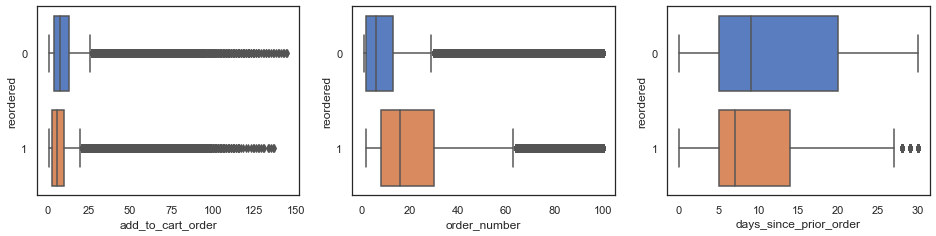

In [50]:
# 수치형 특성
numeric_features = df.dtypes[data.dtypes != 'category'].index
fig = plt.figure(figsize=(16, 16))
i = 1
for f in numeric_features :
    plt.subplot(4,3,i)
    sns.boxplot(data=data, x=f, y = 'reordered', palette="muted")
    i += 1

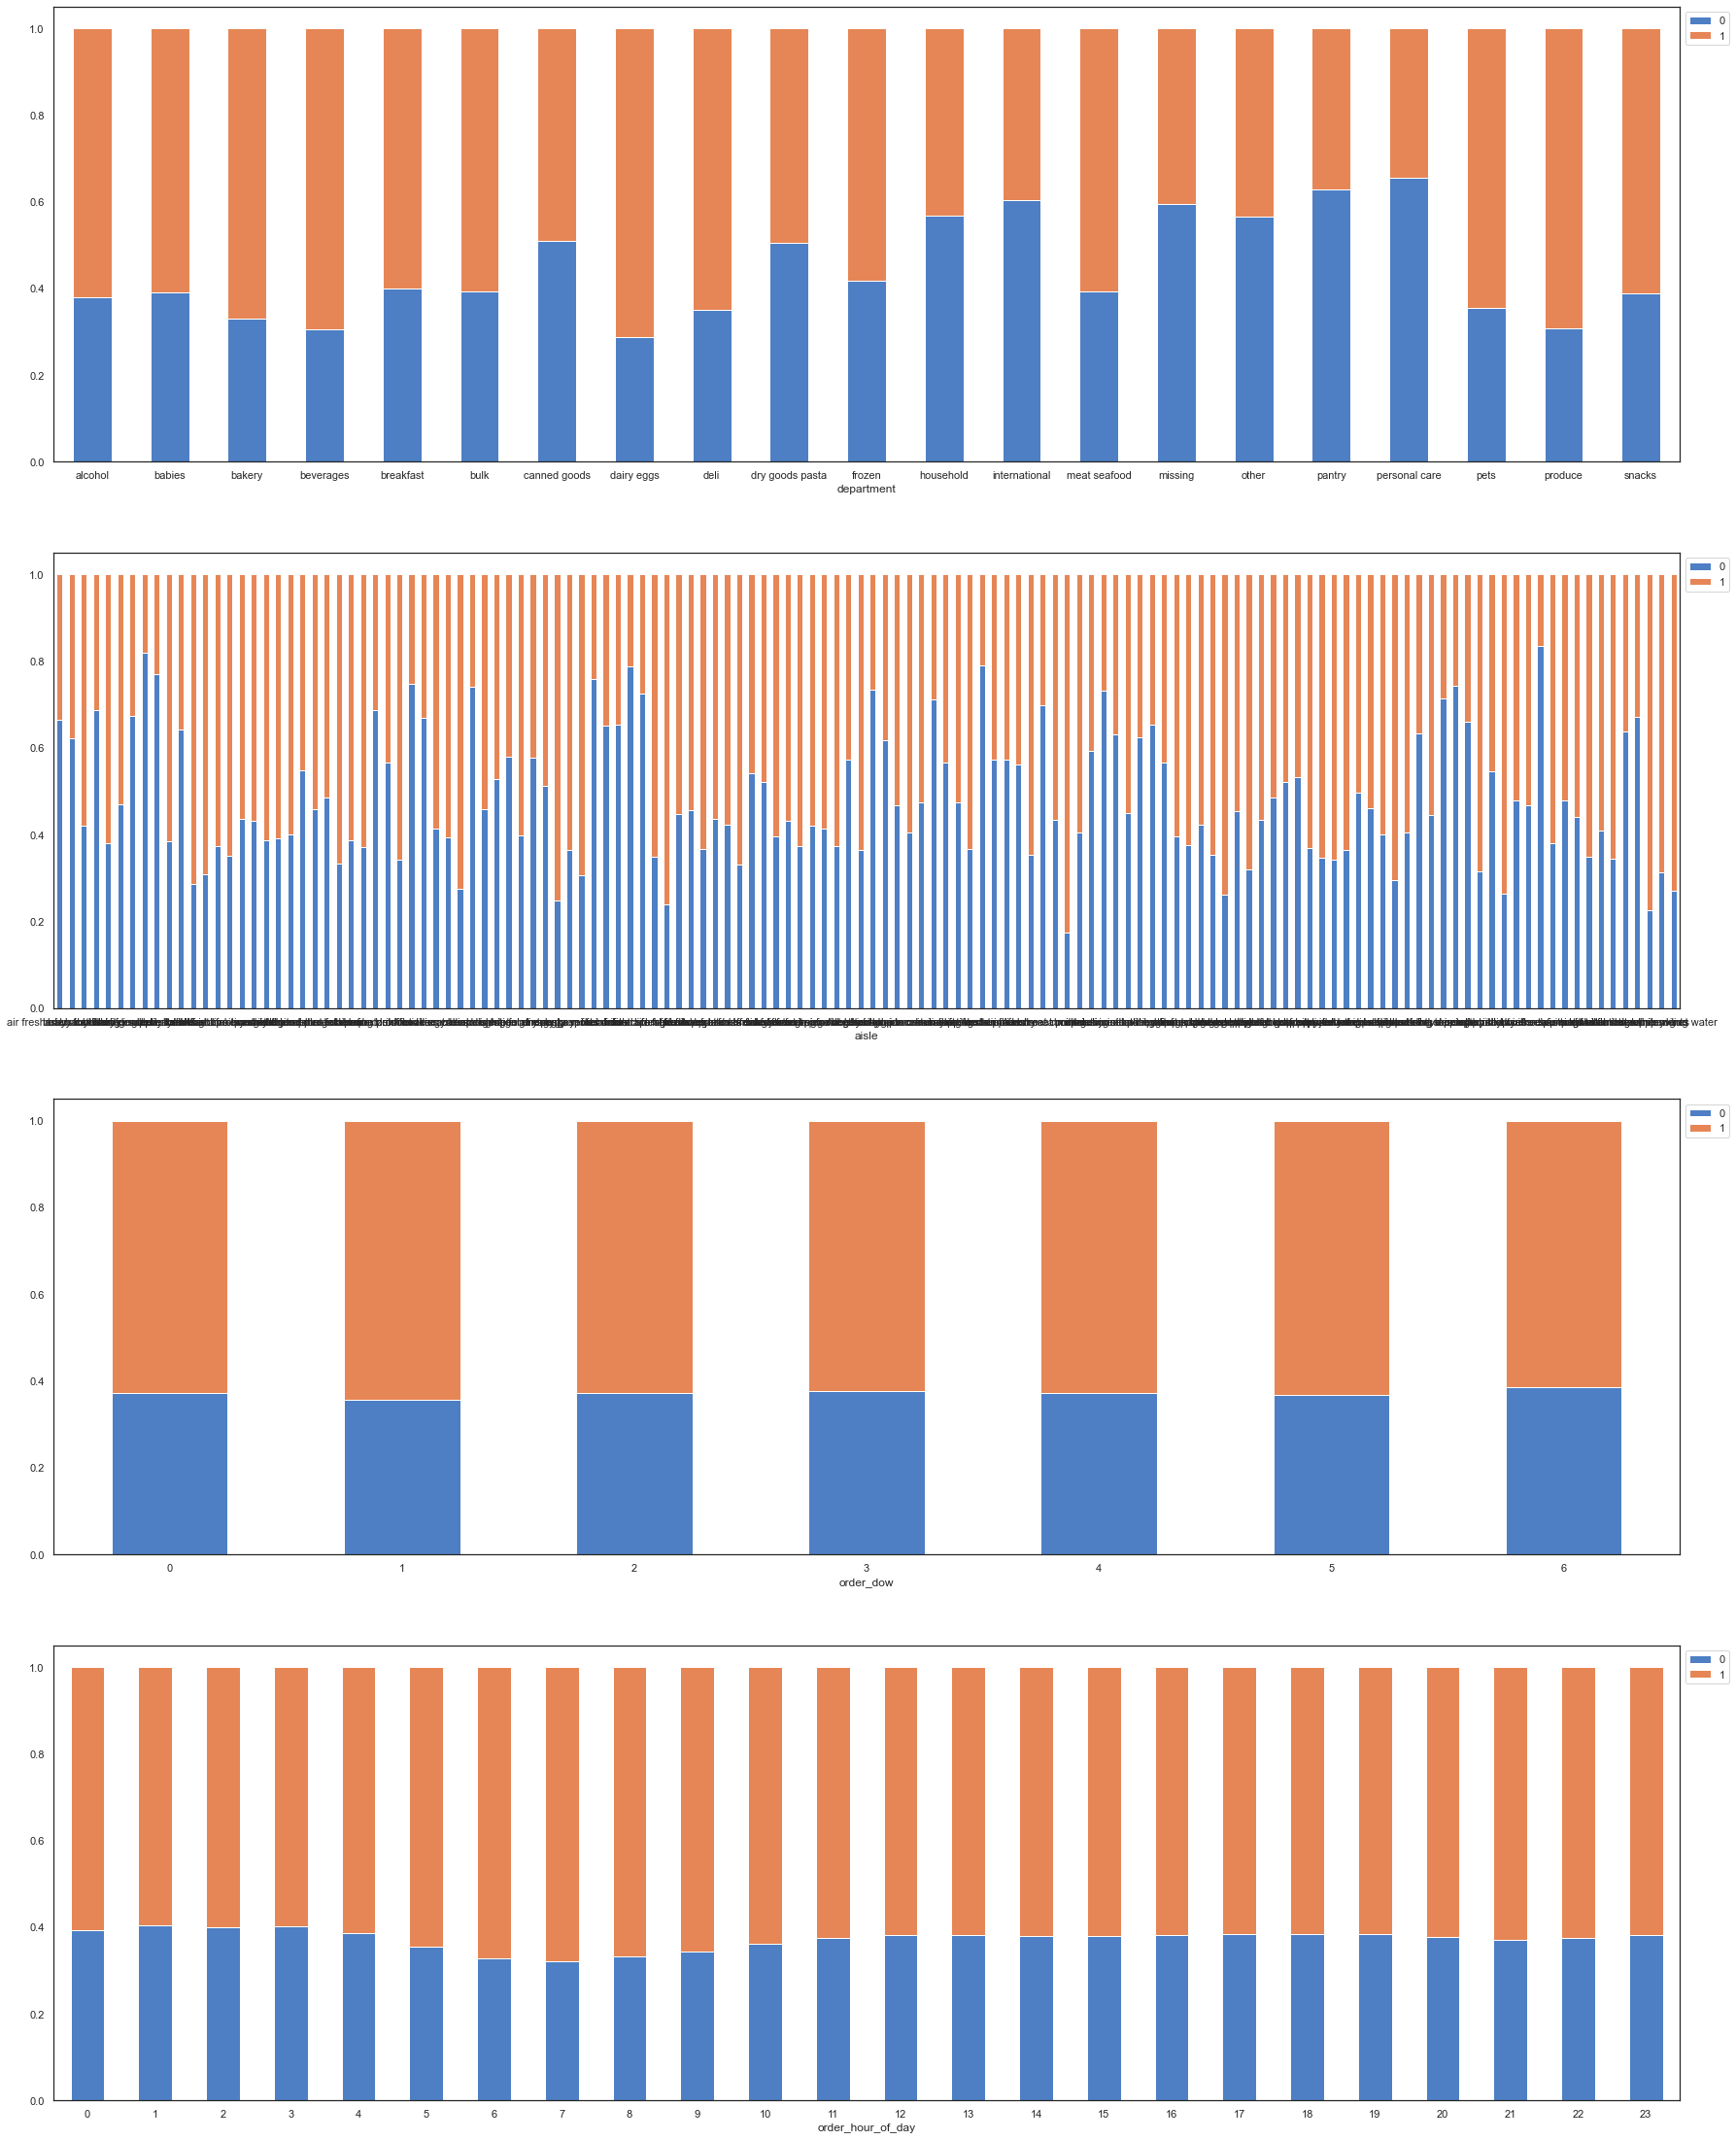

In [51]:
# 범주형 특성 일부와 타겟의 관계를 시각화
# cat_features = data.dtypes[df.dtypes != 'int64'].index
# cat_features = ['product_name', 'department', 'aisle']
cat_features = ['department', 'aisle', 'order_dow', 'order_hour_of_day']
fig = plt.figure(figsize=(30, 50))

for i, feature in enumerate(cat_features) :
    tmp = pd.crosstab(index=df[feature], columns=df['reordered'], normalize='index')
    ax = plt.subplot(5,1,i+1)
    tmp.plot(kind='bar', stacked=True, ax=plt.gca(), color = ['#4e7fc4', '#e68656'])
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    i += 1
plt.show()


In [33]:
from sklearn.model_selection import train_test_split

y = df['reordered']
X = df.drop('reordered', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)

print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (17854333, 8)
X_val shape:  (5951445, 8)
X_test shape:  (7935260, 8)


In [34]:
# 기준모델
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

base = y_train.mode()[0]
y_pred_base = len(y_train) * [base]
print("훈련 정확도: ", accuracy_score(y_train, y_pred_base).round(2))

# 검증세트에서도 정확도를 확인해 볼 수 있습니다.
y_pred_base_val = [base] * len(y_val)
print("검증 정확도: ", accuracy_score(y_val, y_pred_base_val).round(2))

print(classification_report(y_val, y_pred_base_val))

훈련 정확도:  0.63
검증 정확도:  0.63


C:\Users\well_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\well_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00   2209815
           1       0.63      1.00      0.77   3741630

    accuracy                           0.63   5951445
   macro avg       0.31      0.50      0.39   5951445
weighted avg       0.40      0.63      0.49   5951445



C:\Users\well_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# 결정트리모델
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, criterion="entropy", max_depth=10, class_weight="balanced",),
)
pipe_dt.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dt.score(X_train, y_train))
print("검증 정확도: ", pipe_dt.score(X_val, y_val))


y_pred_dt = pipe_dt.predict(X_val)
print(classification_report(y_val, y_pred_dt))

훈련 정확도:  0.6877142932194666
검증 정확도:  0.687421290123659
              precision    recall  f1-score   support

           0       0.57      0.66      0.61   2209815
           1       0.78      0.70      0.74   3741630

    accuracy                           0.69   5951445
   macro avg       0.67      0.68      0.68   5951445
weighted avg       0.70      0.69      0.69   5951445



Text(0.5, 1.0, 'Feature Importance')

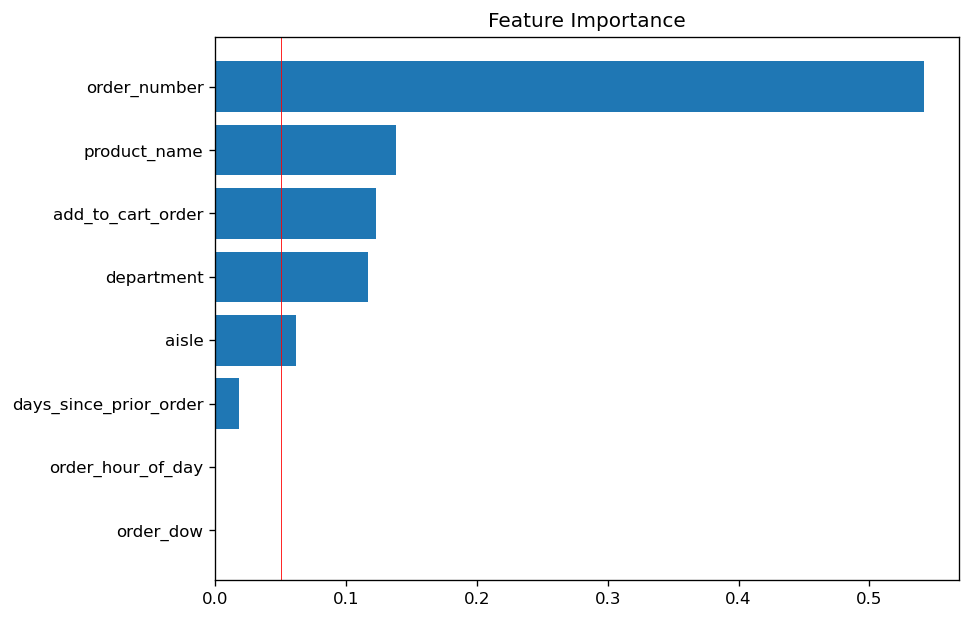

In [36]:
# 특성 중요도(Mean decrease impurity, MDI)
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe_dt.named_steps['decisiontreeclassifier'].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(8, 6), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.05, color="red", linewidth=0.5)
plt.title("Feature Importance")


In [37]:
# 랜덤포레스트 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(
        max_depth = 10,
        random_state=42, 
        oob_score=True, 
        n_jobs=-1,
        class_weight="balanced",
        ),
)

pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

y_pred_rf = pipe_rf.predict(X_val)
print(classification_report(y_val, y_pred_rf))

훈련 정확도:  0.6890780518096083
검증 정확도:  0.6886636774766465
              precision    recall  f1-score   support

           0       0.57      0.67      0.61   2209815
           1       0.78      0.70      0.74   3741630

    accuracy                           0.69   5951445
   macro avg       0.68      0.68      0.68   5951445
weighted avg       0.70      0.69      0.69   5951445



Text(0.5, 1.0, 'Feature Importance')

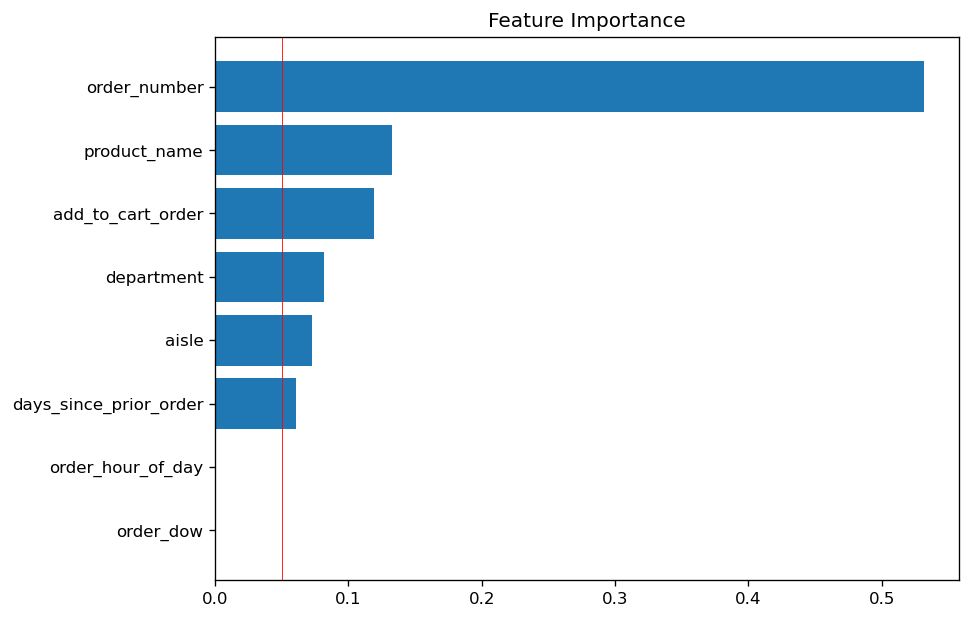

In [38]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe_rf.named_steps["randomforestclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(8, 6), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.05, color="red", linewidth=0.5)
plt.title("Feature Importance")

In [39]:
# XG부스트 모델
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


pipe_gb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
        random_state=42,
        n_jobs=-1,
        max_depth=10,
        learning_rate=0.1,
        scale_pos_weight = 1.5,
    ),
)
print(pipe_gb)

pipe_gb.fit(X_train, y_train)
print("학습 정확도", pipe_gb.score(X_train, y_train))
print("검증 정확도", pipe_gb.score(X_val, y_val))

y_pred_gb = pipe_gb.predict(X_val)
print(classification_report(y_val, y_pred_gb))

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='error',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=

Text(0.5, 1.0, 'Feature Importance')

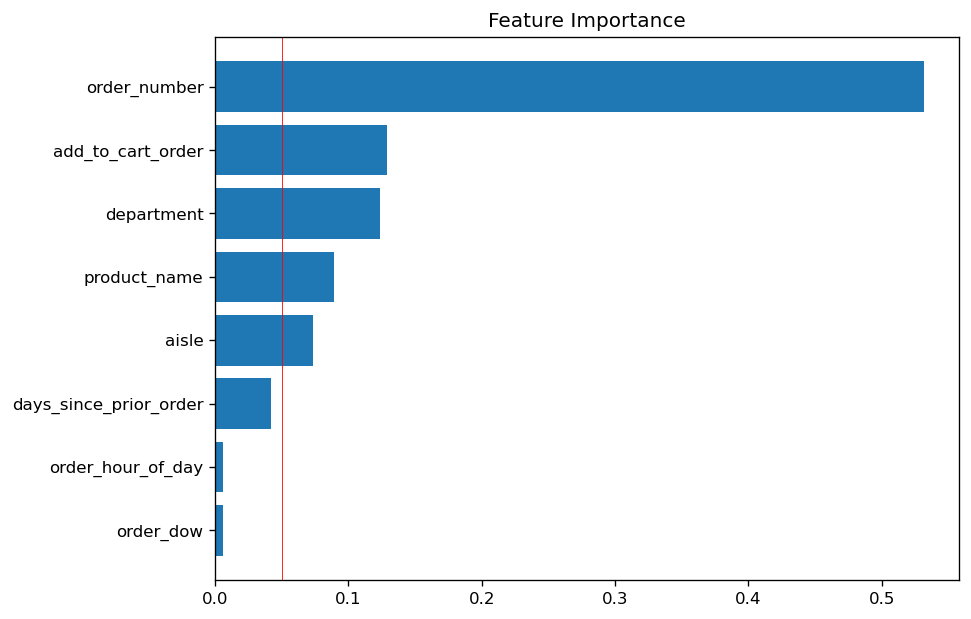

In [40]:
# 특성 중요도(Mean decrease impurity, MDI)
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe_gb.named_steps["xgbclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(8, 6), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.05, color="red", linewidth=0.5)
plt.title("Feature Importance")

In [41]:
# 일반화 성능 확인(XG부스트)
from sklearn.metrics import classification_report, roc_auc_score

y_pred_gb_test = pipe_gb.predict(X_test)
y_pred_proba_test = pipe_gb.predict_proba(X_test)[:, 1]

print("테스트 accuracy", pipe_gb.score(X_test, y_test))
print("테스트 AUC", roc_auc_score(y_test, y_pred_proba_test))
print(classification_report(y_test, y_pred_gb_test))

테스트 accuracy 0.7126058881498527
테스트 AUC 0.7697568605110172
              precision    recall  f1-score   support

           0       0.74      0.35      0.47   2946420
           1       0.71      0.93      0.80   4988840

    accuracy                           0.71   7935260
   macro avg       0.72      0.64      0.64   7935260
weighted avg       0.72      0.71      0.68   7935260



In [42]:
df['reordered'] = df['reordered'].astype('int64')
df['order_dow'] = df['order_dow'].astype('int64')
df['order_hour_of_day'] = df['order_hour_of_day'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31741038 entries, 0 to 31741037
Data columns (total 9 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   add_to_cart_order       int64   
 1   reordered               int64   
 2   product_name            category
 3   department              category
 4   aisle                   category
 5   order_number            int64   
 6   order_dow               int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  int64   
dtypes: category(3), int64(6)
memory usage: 1.6 GB


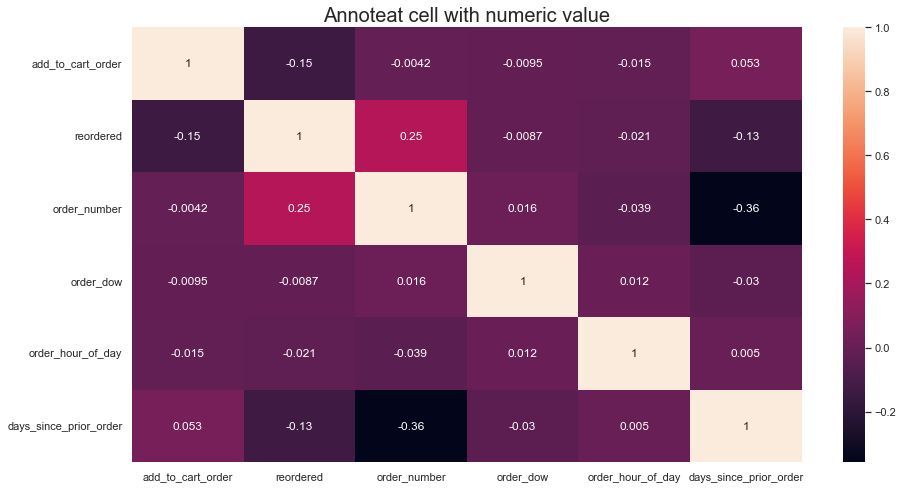

In [43]:
# 상관관계 분석
df_corr = df.corr()
# annot=True argument를 써서 각 셀에 숫자를 입력(annotate each cell with numeric value)

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr, annot=True)
plt.title('Annoteat cell with numeric value', fontsize=20)
plt.show()

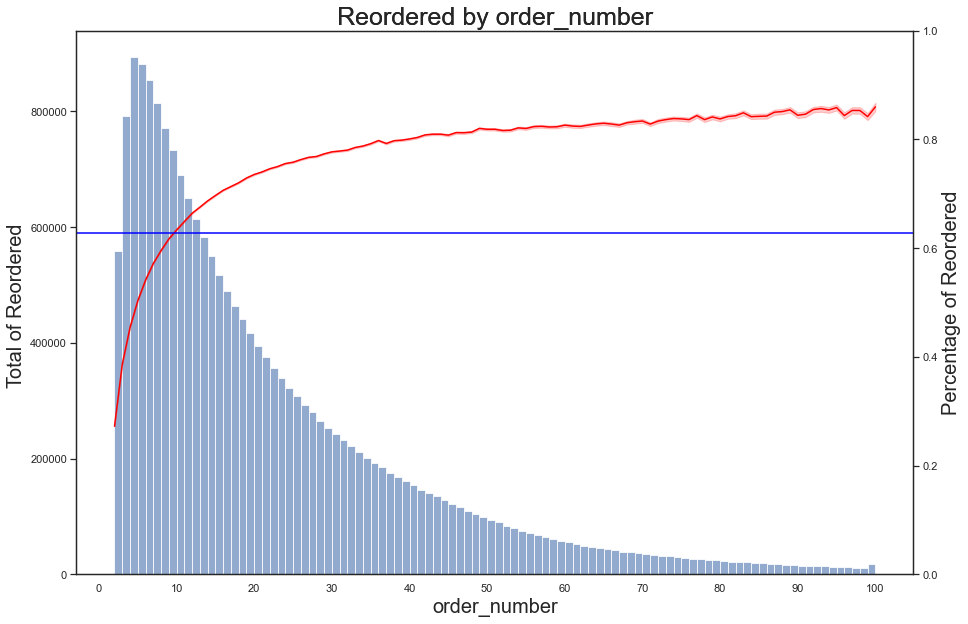

In [4]:
# 재주문건수(reordered=1) df_reordered 데이터셋 생성
# order_number 검토
df_reordered = df[df['reordered']==1]

plt.figure(figsize=(15,10))
sns.set_theme(style='white')


ax1 = sns.histplot(x = df_reordered['order_number'],
                   data = df_reordered,
                  binwidth=1, alpha=0.6)

# xlab and ylab
ax1.set_xlabel('order_number', fontsize=20)
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax1.set_ylabel('Total of Reordered ', fontsize=20)
ax1.set_title('Reordered by order_number', fontsize=25)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='order_number',
                  y='reordered',
                   color ='red',
                  data=df)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
plt.axhline(df['reordered'].mean(), color='blue')
ax2.set_ylabel('Percentage of Reordered', fontsize=20)
ax2.set_title('Reordered by order_number', fontsize=25)

plt.show()

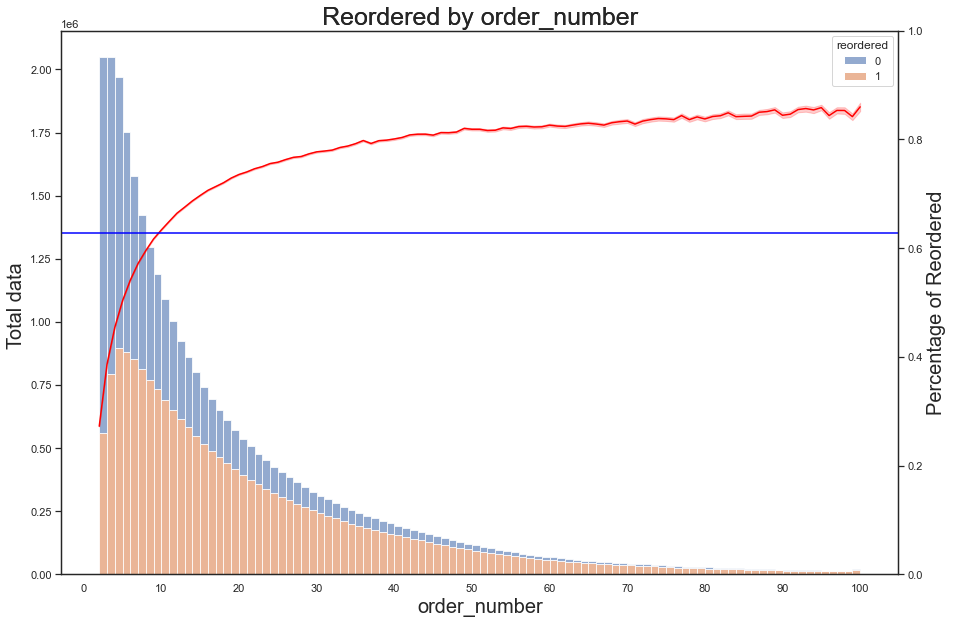

In [5]:
# order_number 검토, 총주문건수 기준
plt.figure(figsize=(15,10))
sns.set_theme(style='white')

ax1 = sns.histplot(x = 'order_number',
                   data = df,
                   hue = "reordered",
                   multiple="stack",
                   binwidth=1,
                   alpha=0.6)

# xlab and ylab
ax1.set_xlabel('order_number', fontsize=20)
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax1.set_ylabel('Total data ', fontsize=20)
ax1.set_title('Reordered by order_number', fontsize=25)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='order_number',
                  y='reordered',
                   color ='red',
                  data=df)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
plt.axhline(df['reordered'].mean(), color='blue')
ax2.set_ylabel('Percentage of Reordered', fontsize=20)
ax2.set_title('Reordered by order_number', fontsize=25)

plt.show()

In [67]:
df_order_number = pd.crosstab(df['order_number'], df['reordered'])
df_
print(df_order_number[0:9])
print(df_order_number[0:9].sum()) # order_numbet 2회~10회 합계
print(df_order_number.sum())
print(df_order_number[0:9].sum()/len(df))

reordered           0       1
order_number                 
2             1490447  557885
3             1258570  792161
4             1075600  894580
5              870202  881757
6              723852  853714
7              610035  814761
8              523581  771212
9              455370  733464
10             399048  689872
reordered
0    7406705
1    6989406
dtype: int64
reordered
0    11785678
1    19955360
dtype: int64
reordered
0   0.23335
1   0.22020
dtype: float64


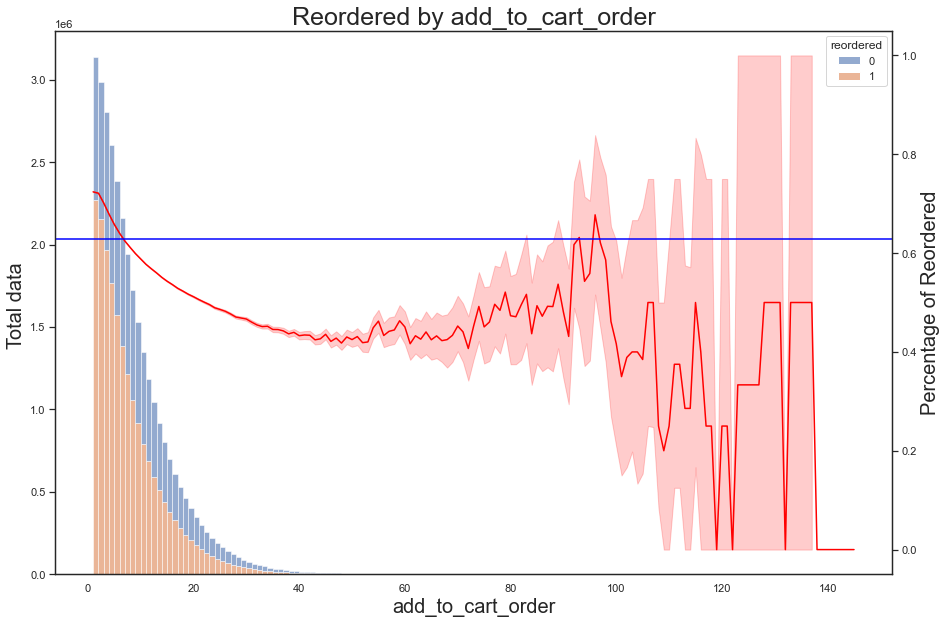

In [6]:
#add_to_cart_order 검토
plt.figure(figsize=(15,10))

ax1 = sns.histplot(x = df['add_to_cart_order'],
                   data = df,
                   hue = "reordered",
                   multiple="stack",
                   binwidth=1,
                   alpha=0.6)

# xlab and ylab
ax1.set_xlabel('add_to_cart_order', fontsize=20)
ax1.set_ylabel('Total data ', fontsize=20)
ax1.set_title('Reordered by add_to_cart_order', fontsize=25)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='add_to_cart_order',
                  y='reordered',
                   color ='red',
                  data=df)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
plt.axhline(df['reordered'].mean(), color='blue')
ax2.set_ylabel('Percentage of Reordered', fontsize=20)

plt.show()

In [74]:
df_add_to_cart_order = pd.crosstab(df['add_to_cart_order'], df['reordered'])
print(df_add_to_cart_order[0:10])
print(df_add_to_cart_order[60:])

reordered               0        1
add_to_cart_order                 
1                  866874  2273000
2                  832744  2154976
3                  837962  1967461
4                  835874  1767415
5                  816139  1570409
6                  778394  1384717
7                  728827  1212135
8                  670566  1055583
9                  612492   915124
10                 555270   792816
reordered            0    1
add_to_cart_order          
61                 465  332
62                 396  302
63                 356  264
64                 310  244
65                 286  211
...                ...  ...
141                  1    0
142                  1    0
143                  1    0
144                  1    0
145                  1    0

[85 rows x 2 columns]


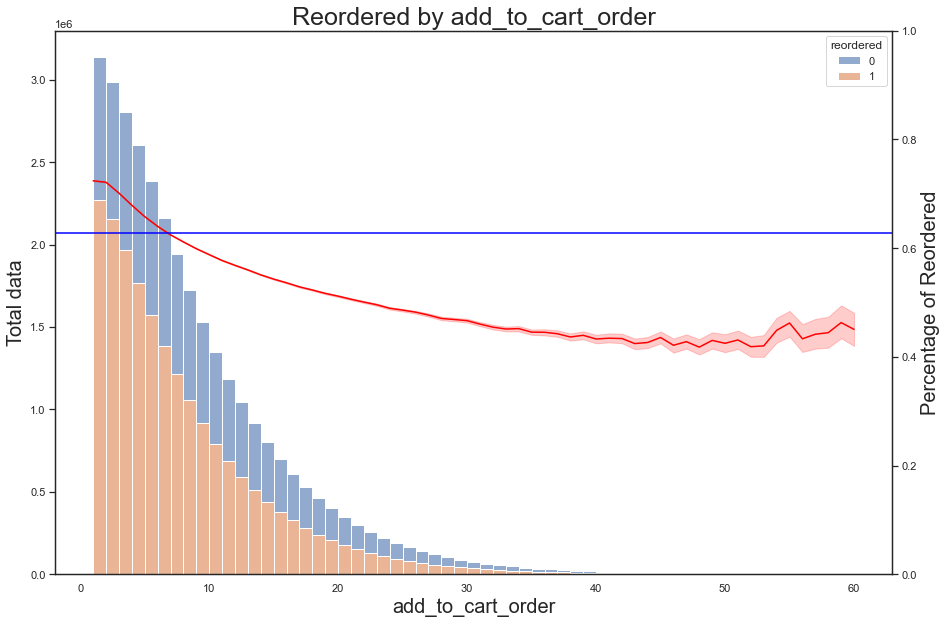

In [7]:
# add_to_cart_order가 60이 넘어가는 경우
# 총주문건수가 적고, 통계적 신뢰성도 낮으므로 데이터 삭제하여 그래프 작성
df_cart = df[df['add_to_cart_order'] <= 60]

plt.figure(figsize=(15,10))

ax1 = sns.histplot(x = df_cart['add_to_cart_order'],
                   data = df_cart,
                   hue = "reordered",
                   multiple="stack",
                   binwidth=1,
                   alpha=0.6)

# xlab and ylab
ax1.set_xlabel('add_to_cart_order', fontsize=20)
# ax1.set_xticks([10,20,30,40])
ax1.set_ylabel('Total data', fontsize=20)
ax1.set_title('Reordered by add_to_cart_order', fontsize=25)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='add_to_cart_order',
                  y='reordered',
                   color ='red',
                  data=df_cart)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
plt.axhline(df['reordered'].mean(), color='blue')
ax2.set_ylabel('Percentage of Reordered', fontsize=20)

plt.show()

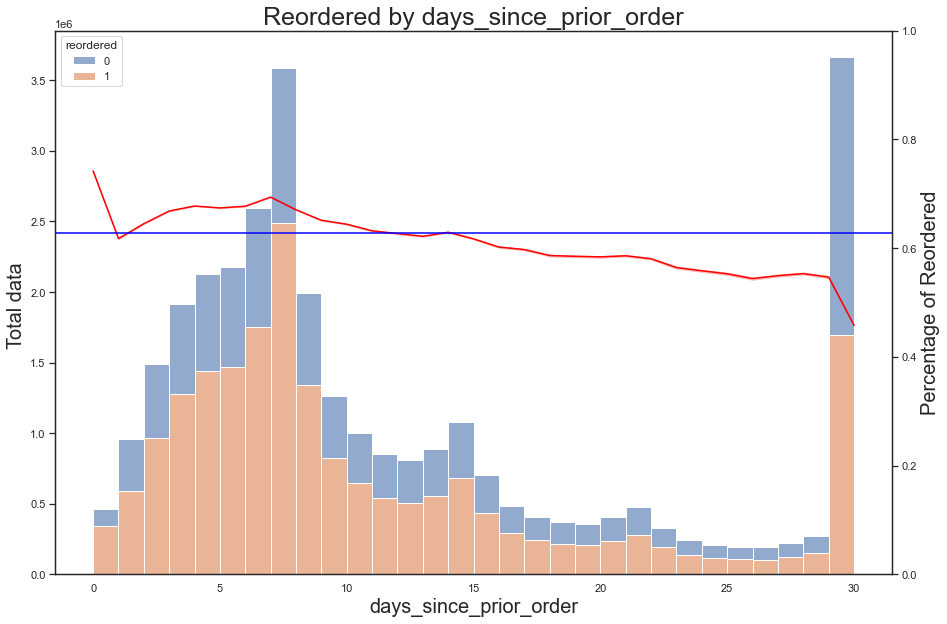

In [8]:
# days_since_prior_order검토
plt.figure(figsize=(15,10))

ax1 = sns.histplot(x = df['days_since_prior_order'],
                   data = df,
                   hue = "reordered",
                   multiple="stack",
                   binwidth=1,
                   alpha=0.6)

# xlab and ylab
ax1.set_xlabel('days_since_prior_order', fontsize=20)
# ax1.set_xticks([10,20,30,40])
ax1.set_ylabel('Total data ', fontsize=20)
ax1.set_title('Reordered by days_since_prior_order', fontsize=25)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='days_since_prior_order',
                  y='reordered',
                   color ='red',
                  data=df)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
plt.axhline(df['reordered'].mean(), color='blue')
ax2.set_ylabel('Percentage of Reordered', fontsize=20)

plt.show()

In [77]:
df_days_since_prior_order = pd.crosstab(df['days_since_prior_order'], df['reordered'])
df_days_since_prior_order 

reordered,0,1
days_since_prior_order,,
0,120215,345527
1,367272,593109
2,529848,962531
3,634984,1279447
4,685690,1440597
5,710903,1469634
6,837009,1755068
7,1097616,2488689
8,657479,1338157


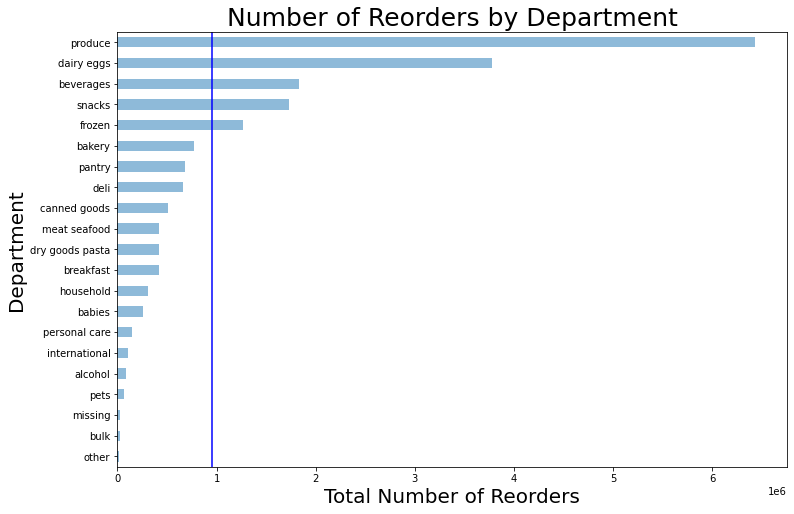

Department_reordered:  950255.2380952381


In [15]:
# department 검토 (재주문데이터, reordered =1)
dep_reordered = df.groupby('department').sum()['reordered'].sort_values()
ax1 = dep_reordered.plot(kind='barh', figsize=(12, 8), alpha =0.5)
ax1.set_ylabel("Department", fontsize=20)
ax1.set_xlabel("Total Number of Reorders", fontsize=20)
ax1.set_title("Number of Reorders by Department", fontsize=25)

plt.axvline(dep_reordered.mean(), color='blue')
plt.show()

print("Department_reordered: ", dep_reordered.mean())

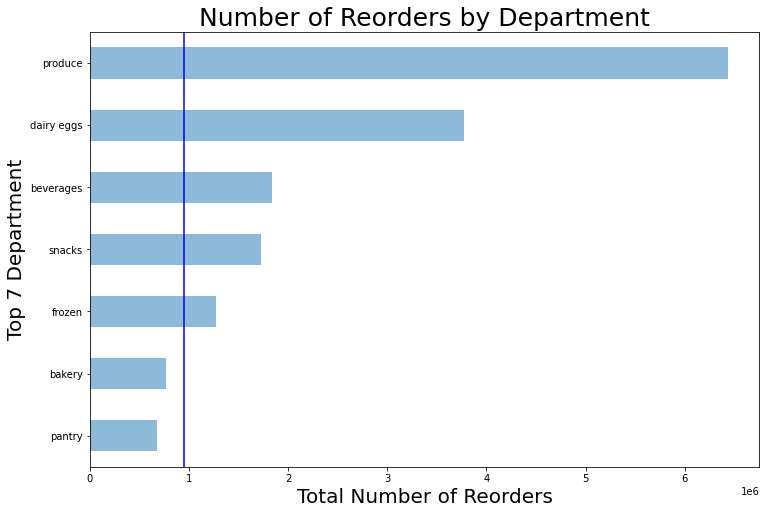

Department_reordered:  950255.2380952381


In [37]:
# department 검토 (재주문데이터, reordered =1)
# 판매량이 평균 이상인 5개의 department

dep_reordered = df.groupby('department').sum()['reordered'].sort_values()
ax1 = dep_reordered.tail(7).plot(kind='barh', figsize=(12, 8), alpha =0.5)
ax1.set_ylabel("Top 7 Department", fontsize=20)
ax1.set_xlabel("Total Number of Reorders", fontsize=20)
ax1.set_title("Number of Reorders by Department", fontsize=25)

plt.axvline(dep_reordered.mean(), color='blue')
plt.show()

print("Department_reordered: ", dep_reordered.mean())

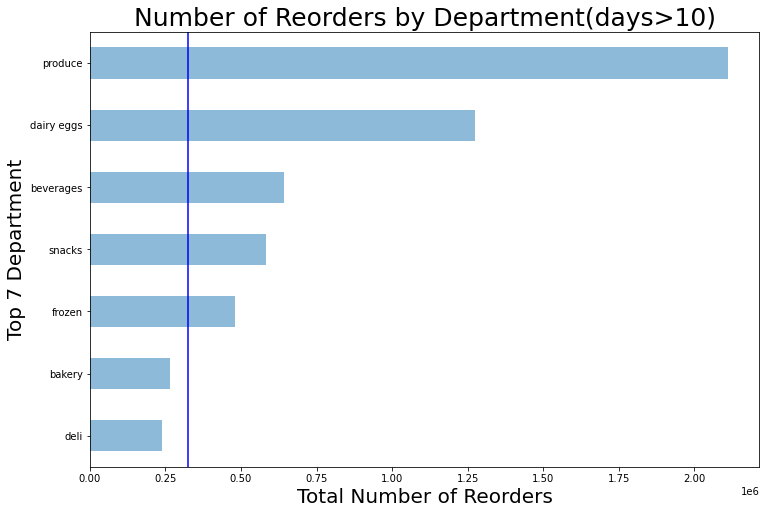

Department_reordered_over10:  324490.61904761905


In [36]:
# days_since_prior_order가 10일 이후인 경우 다른 패턴 가지는지 확인 => 동일한 패턴임을 확인
# department 검토 (재주문데이터, reordered =1)
df_days_over10 = df[df['days_since_prior_order']> 10]
dep_reordered_days_over10 = df_days_over10.groupby('department').sum()['reordered'].sort_values()
ax1 = dep_reordered_days_over10.tail(7).plot(kind='barh', figsize=(12, 8), alpha =0.5)
ax1.set_ylabel("Top 7 Department", fontsize=20)
ax1.set_xlabel("Total Number of Reorders", fontsize=20)
ax1.set_title("Number of Reorders by Department(days>10)", fontsize=25)

plt.axvline(dep_reordered_days_over10.mean(), color='blue')
plt.show()

print("Department_reordered_over10: ", dep_reordered_days_over10.mean())

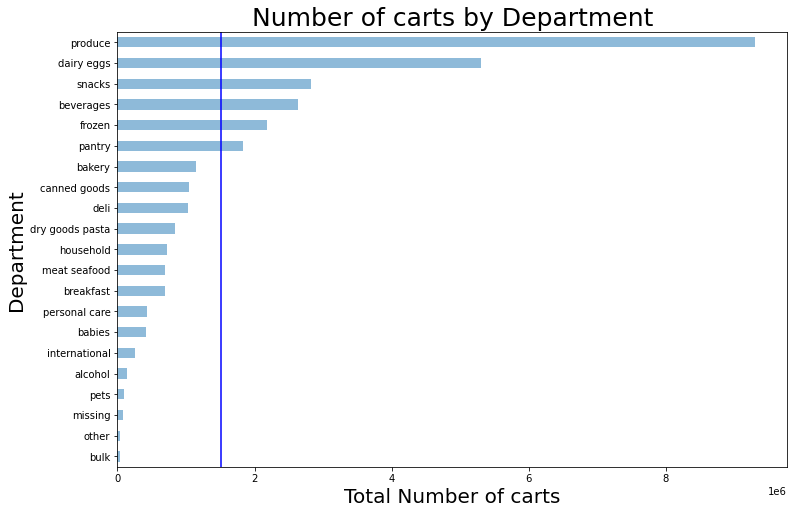

Department_cart:  1511478.0


In [34]:
# department 검토 (총데이터(장바구니), reordered =0, 1)
dep_cart = df.groupby('department').count()['reordered'].sort_values()
ax1 = dep_cart.plot(kind='barh', figsize=(12, 8), alpha =0.5)
ax1.set_ylabel("Department", fontsize=20)
ax1.set_xlabel("Total Number of carts", fontsize=20)
ax1.set_title("Number of carts by Department", fontsize=25)

plt.axvline(dep_cart.mean(), color='blue')
plt.show()

print("Department_cart: ", dep_cart.mean())

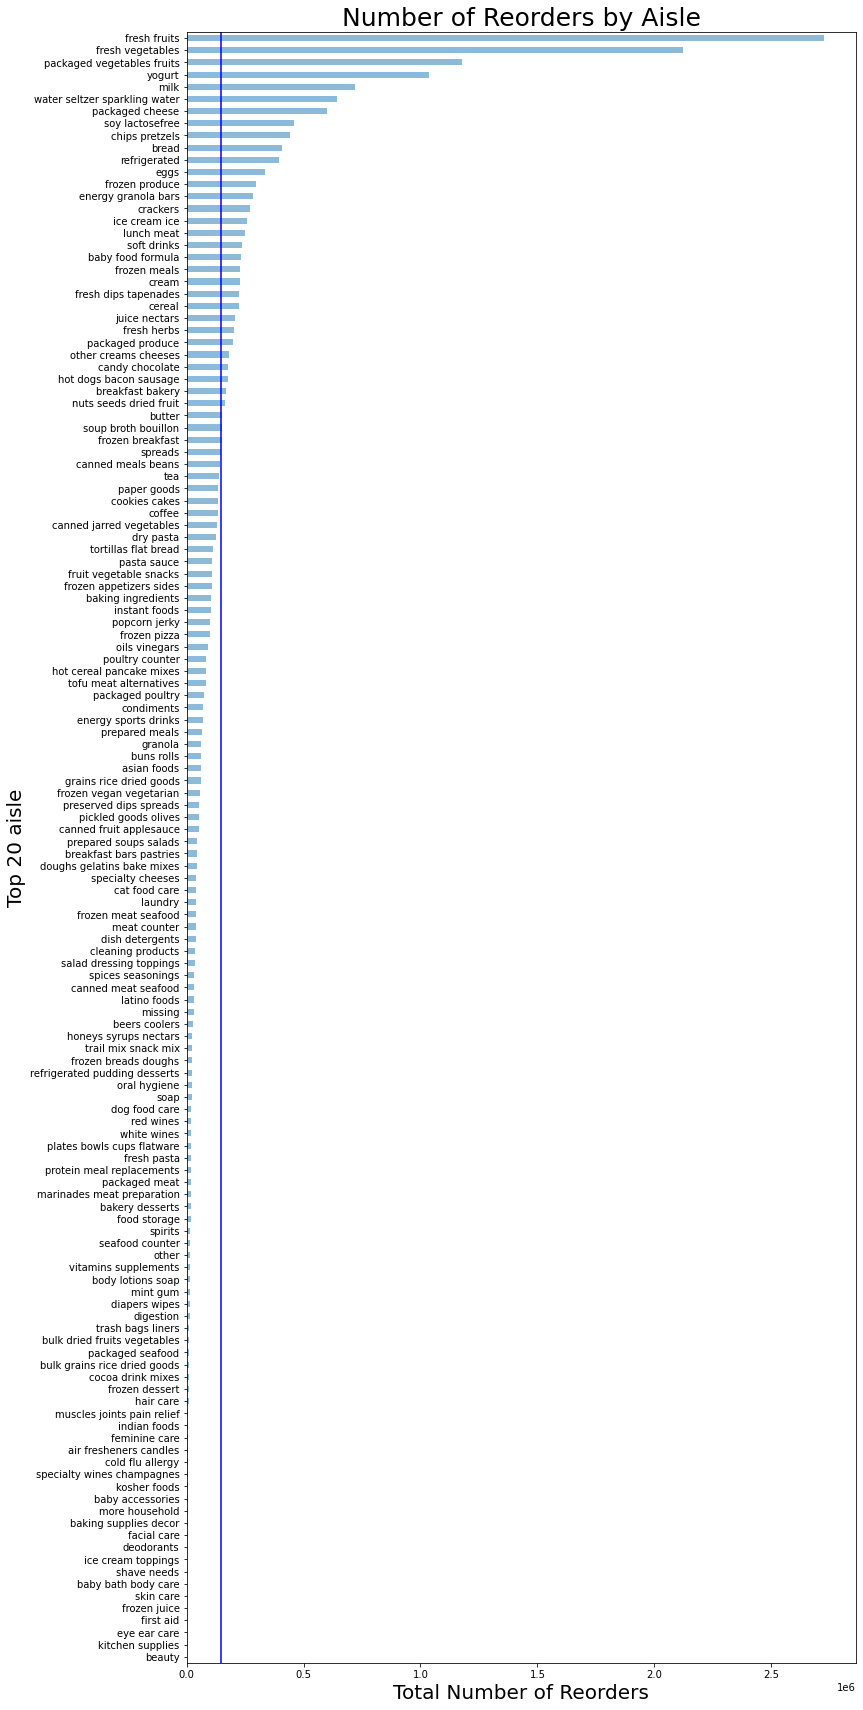

Aisle Reordered: 148920.59701492538


In [19]:
# aisle 검토 (재주문데이터, reordered =1)
aisle_reordered = df.groupby('aisle').sum()['reordered'].sort_values()
ax1 = aisle_reordered.plot(kind='barh', figsize=(12, 30), alpha =0.5)
ax1.set_ylabel("Top 20 aisle", fontsize=20)
ax1.set_xlabel("Total Number of Reorders", fontsize=20)
ax1.set_title("Number of Reorders by Aisle", fontsize=25)

plt.axvline(aisle_reordered.mean(), color='blue')
plt.show()

print("Aisle Reordered:" , aisle_reordered.mean())

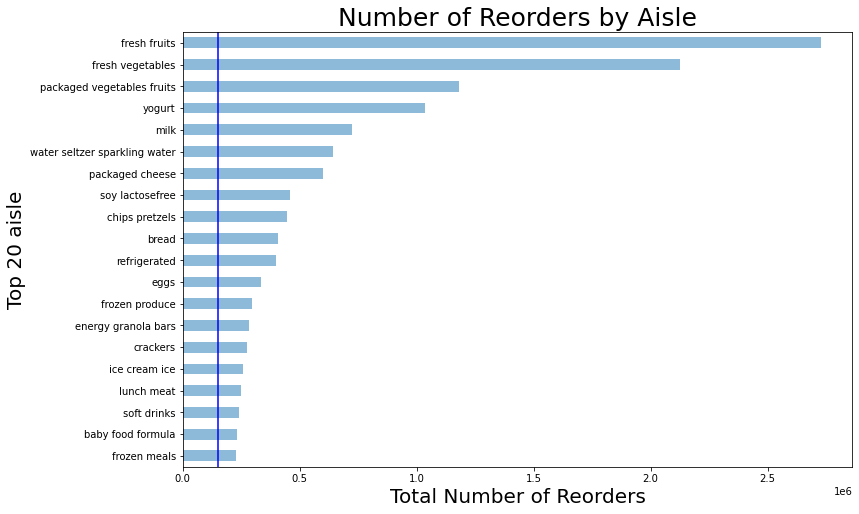

Aisle Reordered: 148920.59701492538


In [21]:
# aisle 검토 (재주문데이터, reordered =1)
# 판매량 변화를 고려하여 상위 20개의 aisle
aisle_reordered = df.groupby('aisle').sum()['reordered'].sort_values()
ax1 = aisle_reordered.tail(20).plot(kind='barh', figsize=(12, 8), alpha =0.5)
ax1.set_ylabel("Top 20 aisle", fontsize=20)
ax1.set_xlabel("Total Number of Reorders", fontsize=20)
ax1.set_title("Number of Reorders by Aisle", fontsize=25)

plt.axvline(aisle_reordered.mean(), color='blue')
plt.show()

print("Aisle Reordered:" , aisle_reordered.mean())

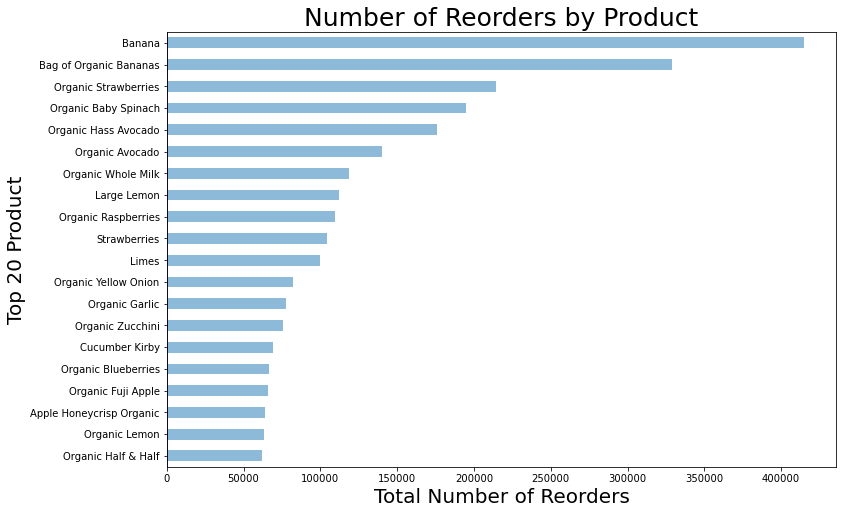

Product_reordered:  401.8478020097062


In [42]:
# Product 검토 (재주문데이터, reordered =1)

pro_reordered = df.groupby('product_name').sum()['reordered'].sort_values()
ax1 = pro_reordered.tail(20).plot(kind='barh', figsize=(12, 8), alpha =0.5)
ax1.set_ylabel("Top 20 Product", fontsize=20)
ax1.set_xlabel("Total Number of Reorders", fontsize=20)
ax1.set_title("Number of Reorders by Product", fontsize=25)

plt.axvline(pro_reordered.mean(), color='blue')
plt.show()

print("Product_reordered: ", pro_reordered.mean())

In [33]:
# 총 49688개의 제품명이 존재, 평균과 중위치를 확인한 결과 판매량이 너무 적은 제품이 많이 존재함을 확인
# 제품 재고 확인 및 제품종류 개선 필요
pro_reordered_top = df.groupby('product_name').sum()['reordered'].sort_values(ascending = False)
print(pro_reordered_top.mean())
print(pro_reordered_top.median())

pro_reordered_top.head(100)

401.8478020097062
23.0


product_name
Banana                               415166
Bag of Organic Bananas               329275
Organic Strawberries                 214448
Organic Baby Spinach                 194939
Organic Hass Avocado                 176173
                                      ...  
Shredded Parmesan                     24259
Bartlett Pears                        23814
Fat Free Milk                         23531
Vanilla Almond Breeze Almond Milk     23519
Organic Milk                          23404
Name: reordered, Length: 100, dtype: int64